In [1]:
pip install spacy


You should consider upgrading via the 'c:\users\seema_dhama\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\seema_dhama\appdata\local\programs\python\python38\lib\site-packages (1.8.2.2)



You should consider upgrading via the 'c:\users\seema_dhama\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [4]:
tweets=pd.read_csv('C:/Users/seema_dhama/OneDrive - Dell Technologies/Desktop/Data Science/Assignments/Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [5]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [6]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

# 1) Extract reviews of any product from ecommerce website like amazon


# 2) Perform emotion mining

In [7]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [8]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [9]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [10]:
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [11]:
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [12]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\seema_dhama\AppData\Local\Temp\ipykernel_21284\3522453337.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [13]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022
...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022


In [14]:
df.to_csv("C:/Users/seema_dhama/OneDrive - Dell Technologies/Desktop/Data Science/Assignments/Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [15]:
pip install -U nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\seema_dhama\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [16]:
pip install plotly

You should consider upgrading via the 'c:\users\seema_dhama\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [17]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\seema_dhama\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
import plotly

from tqdm.notebook import tqdm_notebook


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data..

In [20]:
reviews=pd.read_csv('C:/Users/seema_dhama/OneDrive - Dell Technologies/Desktop/Data Science/Assignments/Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022
...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022


In [21]:
 reviews.shape

(5000, 4)

In [22]:
reviews.Rating.describe()

count    5000.000000
mean        4.282000
std         0.760652
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [23]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I was searching a smartphone in 25-30k segment...,131
1,"*Battery life is decent, if you're a heavy use...",111
2,Con's1. Getting heat while charging2. Average ...,39
3,Bought in big billion day sale but towards the...,123
4,Whn I opened box the phone already had scratch...,36


In [24]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I was searching a smartphone in 25-30k segment...,678.0
1,"*Battery life is decent, if you're a heavy use...",617.0
2,Con's1. Getting heat while charging2. Average ...,263.0
3,Bought in big billion day sale but towards the...,706.0
4,Whn I opened box the phone already had scratch...,201.0


In [25]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I was searching a smartphone in 25-30k segment...,4.183206
1,"*Battery life is decent, if you're a heavy use...",4.567568
2,Con's1. Getting heat while charging2. Average ...,5.769231
3,Bought in big billion day sale but towards the...,4.747967
4,Whn I opened box the phone already had scratch...,4.611111


In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I was searching a smartphone in 25-30k segment...,64
1,"*Battery life is decent, if you're a heavy use...",52
2,Con's1. Getting heat while charging2. Average ...,9
3,Bought in big billion day sale but towards the...,46
4,Whn I opened box the phone already had scratch...,13


In [27]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I was searching a smartphone in 25-30k segment...,0
1,"*Battery life is decent, if you're a heavy use...",0
2,Con's1. Getting heat while charging2. Average ...,0
3,Bought in big billion day sale but towards the...,0
4,Whn I opened box the phone already had scratch...,0


In [28]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I was searching a smartphone in 25-30k segment...,2
1,"*Battery life is decent, if you're a heavy use...",1
2,Con's1. Getting heat while charging2. Average ...,0
3,Bought in big billion day sale but towards the...,1
4,Whn I opened box the phone already had scratch...,0


In [29]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I was searching a smartphone in 25-30k segment...,4
1,"*Battery life is decent, if you're a heavy use...",1
2,Con's1. Getting heat while charging2. Average ...,1
3,Bought in big billion day sale but towards the...,2
4,Whn I opened box the phone already had scratch...,2


In [30]:
reviews.drop(["numerics","hashtags","stopwords","avg_word","char_count","word_count","upper"], axis=1, inplace=True)

In [31]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I was searching a smartphone in 25-ask segment...
1    *Battery life is decent, if you're a heavy use...
2    On's. Getting heat while charging. Average cam...
3    Ought in big billion day sale but towards the ...
4    The I opened box the phone already had scratch...
Name: Review, dtype: object

In [32]:
reviews['Split_Date'] = None
reviews

,Rating,Title,Review,Review_Date,Split_Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,None
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,None
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,None
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,None
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,None
...,...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022,None
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022,None
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022,None
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022,None


In [33]:
reviews

,Rating,Title,Review,Review_Date,Split_Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,None
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,None
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,None
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,None
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,None
...,...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022,None
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022,None
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022,None
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022,None


In [34]:
reviews[['text','Date']] =reviews['Review_Date'].str.split('on',expand =True)

In [35]:
reviews

,Rating,Title,Review,Review_Date,Split_Date,text,Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,None,Reviewed in India 🇮🇳,7 November 2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,None,Reviewed in India 🇮🇳,2 November 2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,None,Reviewed in India 🇮🇳,21 November 2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,None,Reviewed in India 🇮🇳,8 November 2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,None,Reviewed in India 🇮🇳,21 November 2022
...,...,...,...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022,None,Reviewed in India 🇮🇳,15 August 2022
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022,None,Reviewed in India 🇮🇳,28 July 2022
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022,None,Reviewed in India 🇮🇳,26 February 2022
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022,None,Reviewed in India 🇮🇳,29 July 2022


In [36]:
reviews.drop(['Split_Date'],axis =1,inplace = True)

In [37]:
reviews

,Rating,Title,Review,Review_Date,text,Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,Reviewed in India 🇮🇳,7 November 2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,Reviewed in India 🇮🇳,2 November 2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21 November 2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,Reviewed in India 🇮🇳,8 November 2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21 November 2022
...,...,...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022,Reviewed in India 🇮🇳,15 August 2022
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022,Reviewed in India 🇮🇳,28 July 2022
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022,Reviewed in India 🇮🇳,26 February 2022
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022,Reviewed in India 🇮🇳,29 July 2022


In [38]:
reviews.rename(columns ={'Review_Date':'Date_Text'},inplace = True)


In [39]:
reviews.rename(columns ={'Date':'Review_Date'},inplace = True)


In [40]:
reviews

,Rating,Title,Review,Date_Text,text,Review_Date
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,Reviewed in India 🇮🇳,7 November 2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,Reviewed in India 🇮🇳,2 November 2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21 November 2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,Reviewed in India 🇮🇳,8 November 2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21 November 2022
...,...,...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022,Reviewed in India 🇮🇳,15 August 2022
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022,Reviewed in India 🇮🇳,28 July 2022
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022,Reviewed in India 🇮🇳,26 February 2022
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022,Reviewed in India 🇮🇳,29 July 2022


In [41]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0        
1        
2        
3        
4        
       ..
4995     
4996     
4997     
4998     
4999     
Name: Review_Date, Length: 5000, dtype: object 
 0        7
1        2
2       21
3        8
4       21
        ..
4995    15
4996    28
4997    26
4998    29
4999    25
Name: Review_Date, Length: 5000, dtype: object 
 0       November
1       November
2       November
3       November
4       November
          ...   
4995      August
4996        July
4997    February
4998        July
4999        July
Name: Review_Date, Length: 5000, dtype: object


In [42]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[1]
df['Month']=df['Review_Date'].str.split(' ').str[2]
df['Year']=df['Review_Date'].str.split(' ').str[3]
df[['Date','Month','Year']]

,Date,Month,Year
0,7,November,2022
1,2,November,2022
2,21,November,2022
3,8,November,2022
4,21,November,2022
...,...,...,...
4995,15,August,2022
4996,28,July,2022
4997,26,February,2022
4998,29,July,2022


In [43]:
df.Month.value_counts()

August       495
September    449
October      438
July         365
November     337
June         203
May          159
April         97
March         62
February      15
Name: Month, dtype: int64

In [44]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,November
1,November
2,November
3,November
4,November
...,...
4995,August
4996,July
4997,2
4998,July


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4741 non-null   object 
 3   Date_Text    5000 non-null   object 
 4   text         5000 non-null   object 
 5   Review_Date  2620 non-null   object 
 6   Date         2620 non-null   object 
 7   Month        2620 non-null   object 
 8   Year         2620 non-null   object 
dtypes: float64(1), object(8)
memory usage: 351.7+ KB


In [46]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date_Text,text,Date,Month,Year
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,Reviewed in India 🇮🇳,7,November,2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,Reviewed in India 🇮🇳,2,November,2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21,November,2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,Reviewed in India 🇮🇳,8,November,2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21,November,2022


In [47]:
df

,Rating,Title,Review,Date_Text,text,Review_Date,Date,Month,Year
0,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,Reviewed in India 🇮🇳 on 7 November 2022,Reviewed in India 🇮🇳,7 November 2022,7,November,2022
1,4.0,Good one,"*Battery life is decent, if you're a heavy use...",Reviewed in India 🇮🇳 on 2 November 2022,Reviewed in India 🇮🇳,2 November 2022,2,November,2022
2,4.0,Review after using 2+ Months of usage,Con's1. Getting heat while charging2. Average ...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21 November 2022,21,November,2022
3,4.0,Best for elderly people,Bought in big billion day sale but towards the...,Reviewed in India 🇮🇳 on 8 November 2022,Reviewed in India 🇮🇳,8 November 2022,8,November,2022
4,4.0,Suspect box was opened,Whn I opened box the phone already had scratch...,Reviewed in India 🇮🇳 on 21 November 2022,Reviewed in India 🇮🇳,21 November 2022,21,November,2022
...,...,...,...,...,...,...,...,...,...
4995,2.0,Charger given along with package not working,Charger given along with the package is not wo...,Reviewed in India 🇮🇳 on 15 August 2022,Reviewed in India 🇮🇳,15 August 2022,15,August,2022
4996,5.0,okay,okay but,Reviewed in India 🇮🇳 on 28 July 2022,Reviewed in India 🇮🇳,28 July 2022,28,July,2022
4997,4.0,"Battery backup low,call recording is not good,","Battery backup low,call recording is not good,...",Reviewed in India 🇮🇳 on 26 February 2022,Reviewed in India 🇮🇳,26 February 2022,26,February,2022
4998,5.0,Nice phone,No negative,Reviewed in India 🇮🇳 on 29 July 2022,Reviewed in India 🇮🇳,29 July 2022,29,July,2022


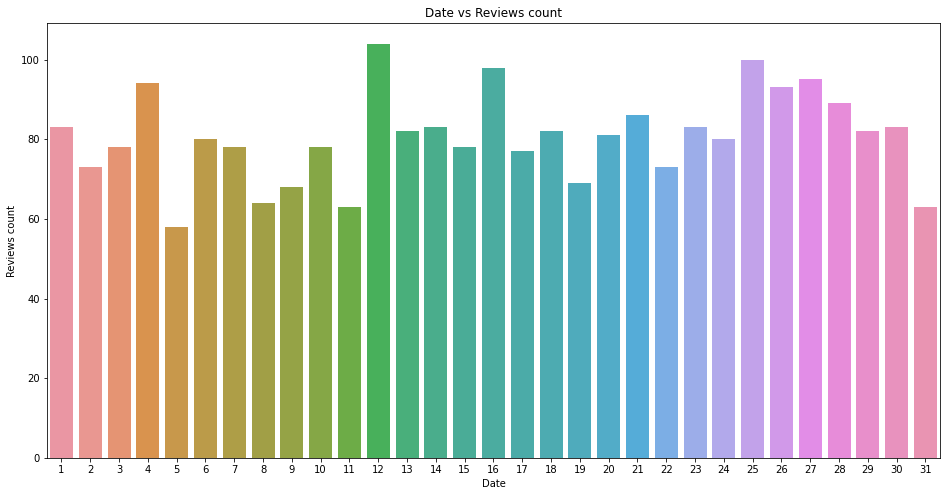

In [48]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

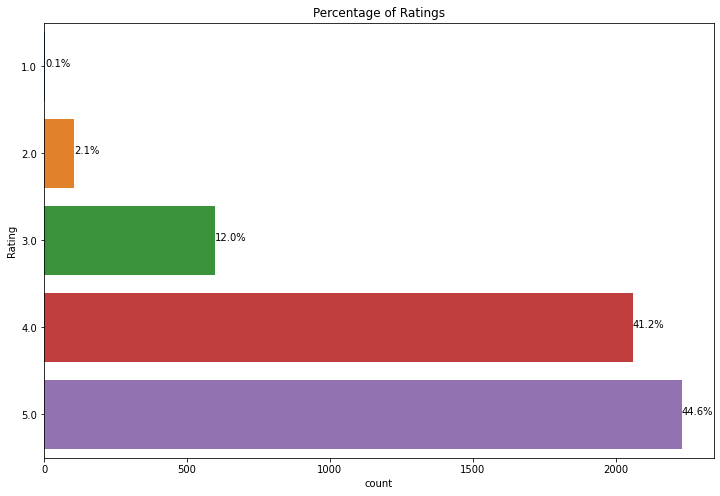

In [49]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

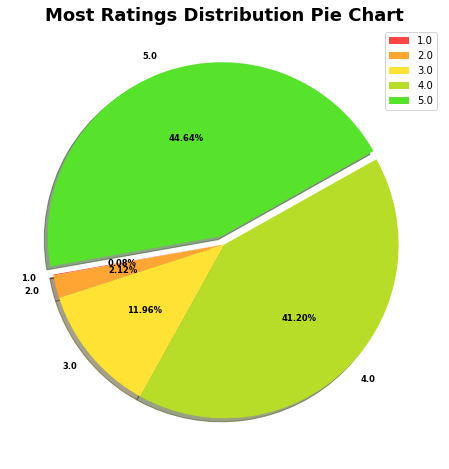

In [50]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [51]:
data = df[['Review']]
data

,Review
0,I was searching a smartphone in 25-30k segment...
1,"*Battery life is decent, if you're a heavy use..."
2,Con's1. Getting heat while charging2. Average ...
3,Bought in big billion day sale but towards the...
4,Whn I opened box the phone already had scratch...
...,...
4995,Charger given along with the package is not wo...
4996,okay but
4997,"Battery backup low,call recording is not good,..."
4998,No negative


In [52]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [53]:
data

,Review
0,i searching smartphone 25-30k segment checked ...
1,"*battery life decent, heavy user get backup 12..."
2,con's1. getting heat charging2. average camera...
3,bought big billion day sale towards end. my ex...
4,whn i opened box phone already scratch guard f...
...,...
4995,charger given along package working correct on...
4996,okay
4997,"battery backup low,call recording good, also e..."
4998,no negative


In [54]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [55]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [56]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...


In [57]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [58]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [59]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [60]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [61]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [62]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [63]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [64]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [65]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [66]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [67]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...,"[searching, smartphone, k, segment, checked, l..."
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use...","[battery, life, decent, heavy, user, get, back..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...,"[con, getting, heat, charging, average, camera..."
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...,"[bought, big, billion, day, sale, towards, end..."
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...,"[whn, opened, box, phone, already, scratch, gu..."
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl...","[month, nice, price, one, plus, brand, camera,..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...,"[six, month, use, would, like, say, good, phon..."
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat...","[phone, worth, compare, money, battery, ok, ca..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l...","[good, phone, fast, charging, sensor, battery,..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...,"[good, phone, price, range, heat, little, drai..."


In [68]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [69]:
import codecs
with codecs.open("C:/Users/seema_dhama/OneDrive - Dell Technologies/Desktop/Data Science/Assignments/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [70]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [71]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
1,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
2,con getting heat charging average camera quali...,Con's1. Getting heat while charging2. Average ...
3,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
4,whn opened box phone already scratch guard fit...,Whn I opened box the phone already had scratch...
5,month nice price one plus brand camera good be...,"After 3 months, Nice at this price from one pl..."
6,six month use would like say good phone price ...,After the six months of use i would like to sa...
7,phone worth compare money battery ok camera mu...,"All over phone is worth compare to money , bat..."
8,good phone fast charging sensor battery life p...,"A good phone, fast charging sensors, battery l..."
9,good phone price range heat little drain batte...,Good phone in this price range. It heats up a ...


In [72]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['battery', 'life', 'decent', 'heavy', 'user', 'get', 'backup', 'hr', 'charge', 'heavy', 'user', 'getting', 'backup', 'hr', 'camera', 'also', 'good', 'night', 'mode', 'working', 'good', 'good', 'light', 'get', 'satisfaction', 'main', 'issue', 'phone', 'brightness', 'keeping', 'brightness', 'level', 'lowest', 'able', 'see', 'thing', 'properly', 'night', 'also', 'outdoor', 'keep', 'brightness', 'high', 'affect', 'battery', 'backup', 'till', 'faced', 'one', 'issue', 'brightness', 'rest', 'working', 'fine'])

In [73]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [searching, smartphone, k, segment, checked, l...
1    [battery, life, decent, heavy, user, get, back...
2    [con, getting, heat, charging, average, camera...
3    [bought, big, billion, day, sale, towards, end...
4    [whn, opened, box, phone, already, scratch, gu...
5    [month, nice, price, one, plus, brand, camera,...
6    [six, month, use, would, like, say, good, phon...
7    [phone, worth, compare, money, battery, ok, ca...
8    [good, phone, fast, charging, sensor, battery,...
9    [good, phone, price, range, heat, little, drai...
Name: Clean_Reviews, dtype: object

In [74]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [75]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,search smartphon k segment check lot phone cou...
1,batteri life decent heavi user get backup hr c...
2,con get heat charg averag camera qualiti feoon...
3,bought big billion day sale toward end experi ...
4,whn open box phone alreadi scratch guard fit p...
...,...
4937,charger given along packag work correct one pl...
4938,okay
4939,batteri backup low call record good also earph...
4940,negat


In [76]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\seema_dhama\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,searching smartphone k segment checked lot pho...
1,battery life decent heavy user get backup hr c...
2,con getting heat charging average camera quali...
3,bought big billion day sale towards end experi...
4,whn opened box phone already scratch guard fit...
...,...
4937,charger given along package working correct on...
4938,okay
4939,battery backup low call recording good also ea...
4940,negative


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [78]:
print(cv.get_feature_names()[109:200])

['alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternative', 'although', 'altogether', 'always', 'amaze', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazone', 'amazonit', 'amazoooon', 'ambient', 'amd', 'amezing', 'amezon', 'amh', 'amloiedover', 'amo', 'amoled', 'amolid', 'among', 'amount', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andfinger', 'andif', 'andorid', 'android', 'androidbattery', 'angel', 'angle', 'angry', 'animation', 'announce', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywehe', 'anywhere', 'aod', 'apart', 'aperture', 'apex', 'app', 'apparent', 'apparently', 'appear', 'appearance', 'appeared', 'appearing', 'appears', 'apperance', 'apple', 'application', 'appliction', 'applied', 'applies', 'applying']


c:\users\seema_dhama\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [79]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aap', 'aapko', 'aati', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absolutely', 'absolutelybut', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'achha', 'achhi', 'achi', 'achieved', 'act', 'activate', 'activated', 'activates', 'active', 'activity', 'actual', 'actually', 'ad', 'adapter', 'adaption', 'adaptive', 'adaptor', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'address', 'adjust', 'adjusted', 'adjustment', 'admirable', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adventurous', 'advertised', 'advice', 'aesthetic', 'aesthetically', 'affect', 'afford', 'affordable', 'aftar', 'afterall', 'afterwards', 'agai', 'againoverall', 'agar'